First try for a MNIST fashion learning

Load MNIST Fashion datasets

In [1]:
import torch
import numpy as np

from torchvision import datasets, transforms

transform = transforms.ToTensor()
trainMnist = datasets.FashionMNIST("./fashionMnist", download=True, train=True, transform = transform)
testMnist = datasets.FashionMNIST("./fashionMnist", download=True, train=False, transform=transform)

Using downloaded and verified file: ./fashionMnist/FashionMNIST/raw/train-images-idx3-ubyte.gz
Extracting ./fashionMnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./fashionMnist/FashionMNIST/raw

Using downloaded and verified file: ./fashionMnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./fashionMnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./fashionMnist/FashionMNIST/raw

Using downloaded and verified file: ./fashionMnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./fashionMnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./fashionMnist/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./fashionMnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./fashionMnist/FashionMNIST/raw



Show tensor data of first 

In [3]:
trainData = torch.utils.data.DataLoader(trainMnist)
testData = torch.utils.data.DataLoader(testMnist)

for images, labels in trainData:
    print(images.view(-1, 28*28))
    break

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
         0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0039, 0.0

Next show a image so we see it is correctly loaded

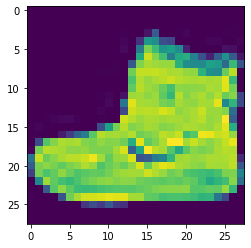

In [4]:
import matplotlib.pyplot as plt

for images, labels in trainData:
    plt.imshow(images[0][0])
    break

Create a simple network with 28*28 input because a picture has 28*28 dimension and Output 10 because there are 10 possible targets

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(28*28, 100)
        self.layer2 = nn.Linear(100, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.layer1(x)
        x = F.relu(x)
        output = self.layer2(x)

        return output
    


In [6]:
model = Net()

Not trained the model it predicts a random value, in this case Nr. 3 

tensor([[ 0.1445,  0.0339,  0.0432, -0.1068, -0.1523, -0.0092, -0.0353, -0.3057,
         -0.0342, -0.2244]], grad_fn=<AddmmBackward0>)


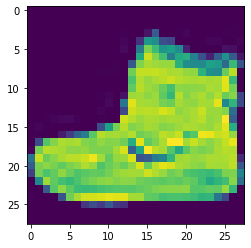

In [9]:
for images, labels in trainData:
    result = model(images)
    print(result)
    plt.imshow(images[0][0])
    break

use CrossEntroyLoss as loss function

In [11]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss(reduction='sum')

Train the model, not using cuda because its not so hard to train

In [13]:
for epoch in range(10):
    loss_sum = 0
    for images, labels in trainData:
        
        result = model(images)

        loss = loss_fn(result, labels)
        loss_sum += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(loss_sum / len(trainData))

0.43470991822260924
0.382532599695737
0.3540912133492548
0.3338348722893999
0.31837247110932415
0.3039739598744933
0.2921217043733823
0.2823661327678023
0.272790784073704
0.264004329065465


In [14]:
len(testData)

10000

test the trained model

In [32]:
correct = 0

for images, labels in testData:
    result = model(images)

    c = torch.eq(labels, torch.argmax(result));

    if(c == True):
      correct += 1

print("correct: ", correct, " prdiction propability: ", correct / len(testData) * 100)


correct:  8714  prdiction propability:  87.14
